In [309]:
# Generate expiry date

import numpy as np
import pandas as pd 

In [310]:
data = {
    'Product' : ['Milk', 'Software Trial', 'API Token', 'Medicine'],
    'Start Date' : pd.to_datetime(['2025-05-22', '2025-05-22', '2025-05-22', '2025-05-22']),
    'Expriry_Type' : ['7 Days', '30 Days', '1 Year', '2 Years'],
}
df = pd.DataFrame(data)

In [311]:
df

,Product,Start Date,Expriry_Type
0,Milk,2025-05-22,7 Days
1,Software Trial,2025-05-22,30 Days
2,API Token,2025-05-22,1 Year
3,Medicine,2025-05-22,2 Years


In [312]:
def calculate_expiry(row):
    start_date = row['Start Date']
    expiry_type = row['Expriry_Type']

    if expiry_type == '7 Days':
        return start_date + pd.Timedelta(days=7)
    elif expiry_type == '30 Days':
        return start_date + pd.Timedelta(days=30)
    elif expiry_type == '1 Year':
        return start_date + pd.DateOffset(years=1)
    elif expiry_type == '2 Years':
        return start_date + pd.DateOffset(years=2)
    else:
        return None

In [313]:
df['Expiry Date'] = df.apply(calculate_expiry, axis=1)

In [314]:
df

,Product,Start Date,Expriry_Type,Expiry Date
0,Milk,2025-05-22,7 Days,2025-05-29
1,Software Trial,2025-05-22,30 Days,2025-06-21
2,API Token,2025-05-22,1 Year,2026-05-22
3,Medicine,2025-05-22,2 Years,2027-05-22


In [315]:
# How will you create a series from dict in Pandas?

data = {
    'index' : ['a', 'b', 'c'],
    'value' : [1, 2, 3]
}

df = pd.Series(data['value'], index=data['index'])
df

a    1
b    2
c    3
dtype: int64

In [316]:
# How to get unique items of a specific column?

df = pd.read_csv('Bengaluru_House_Data.csv')

In [317]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [318]:
# How to handle missing data in python?

# 1. Drop rows with missing values
df.dropna()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [319]:
# 2. Fill missing values with a specific value
df.fillna(0)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,0,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [320]:
# 3. Fill missing values with the mean of the column

df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

numeric_mean = df[['total_sqft', 'price']].mean()
df.fillna(numeric_mean,)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [321]:
# 4. Fill missing values with the median of the column
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
numeric_median = df[['total_sqft', 'price']].median()

df.fillna(numeric_median, )

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [322]:
# 5. Fill missing values with the mode of the column
df.fillna(df['area_type'].mode()[0])


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Super built-up Area,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Super built-up Area,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Super built-up Area,3600.0,5.0,Super built-up Area,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [323]:

df.fillna(df['location'].mode()[0])

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Whitefield,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Whitefield,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Whitefield,3600.0,5.0,Whitefield,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [324]:
# 6. Fill missing values with the previous value
df.fillna(method='ffill')

C:\Users\admi\AppData\Local\Temp\ipykernel_5100\1085365480.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Theanmp,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Soiewre,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,ArsiaEx,3600.0,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [325]:
# 7. Fill missing values with the next value
df.fillna(method='bfill')

C:\Users\admi\AppData\Local\Temp\ipykernel_5100\186220317.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Soiewre,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,DuenaTa,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Mahla T,3600.0,5.0,1.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [326]:
# How can we convert DataFrame into an excel/csv file?

df.to_csv('output.csv', index=False)
df.to_excel('output.xlsx', index=False)

In [327]:
# How to Reset the index?
df.reset_index(drop=True, inplace=True)

In [328]:
# Difference between iloc/loc and iat/at in pandas?

df.loc[1:3, 'area_type']

1              Plot  Area
2          Built-up  Area
3    Super built-up  Area
Name: area_type, dtype: object

In [329]:
df.iloc[1:3, 0]

1        Plot  Area
2    Built-up  Area
Name: area_type, dtype: object

In [330]:
# How to sort the columns?
df.sort_index(axis=1, ascending=False)

,total_sqft,society,size,price,location,bath,balcony,availability,area_type
0,1056.0,Coomee,2 BHK,39.07,Electronic City Phase II,2.0,1.0,19-Dec,Super built-up Area
1,2600.0,Theanmp,4 Bedroom,120.00,Chikka Tirupathi,5.0,3.0,Ready To Move,Plot Area
2,1440.0,NaN,3 BHK,62.00,Uttarahalli,2.0,3.0,Ready To Move,Built-up Area
3,1521.0,Soiewre,3 BHK,95.00,Lingadheeranahalli,3.0,1.0,Ready To Move,Super built-up Area
4,1200.0,NaN,2 BHK,51.00,Kothanur,2.0,1.0,Ready To Move,Super built-up Area
...,...,...,...,...,...,...,...,...,...
13315,3453.0,ArsiaEx,5 Bedroom,231.00,Whitefield,4.0,0.0,Ready To Move,Built-up Area
13316,3600.0,NaN,4 BHK,400.00,Richards Town,5.0,NaN,Ready To Move,Super built-up Area
13317,1141.0,Mahla T,2 BHK,60.00,Raja Rajeshwari Nagar,2.0,1.0,Ready To Move,Built-up Area
13318,4689.0,SollyCl,4 BHK,488.00,Padmanabhanagar,4.0,1.0,18-Jun,Super built-up Area


In [331]:
# Vertical and horizontal concat of data frame

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'C': [5, 6], 'D': [7, 8]})
df3 = pd.concat([df1, df2], axis=0)  # Vertical concat
df4 = pd.concat([df1, df2], axis=1)  # Horizontal concat

In [332]:
df3

,A,B,C,D
0,1.0,3.0,NaN,NaN
1,2.0,4.0,NaN,NaN
0,NaN,NaN,5.0,7.0
1,NaN,NaN,6.0,8.0


In [333]:
df4

,A,B,C,D
0,1,3,5,7
1,2,4,6,8


In [334]:
# Filter dataframe using column value
df[df['area_type'] == 'Super built-up  Area']


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,NaN,204.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345.0,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [335]:
df[df['area_type'].isin(['Super built-up  Area', 'Built-up  Area'])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [336]:

df[df['area_type'].str.contains('Super built-up  Area')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,NaN,204.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345.0,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [337]:
# Red Candle with 50% Stoploss (Candles of Previous 2 days should be red candle. ) and
# perform Buy/Sell/Hold operation on it.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [338]:
stock_data = yf.download('AAPL', start = '2024-01-01', end = '2025-05-01')

[*********************100%***********************]  1 of 1 completed


In [339]:
stock_data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290421,187.070068,182.553143,185.789438,82488700
2024-01-03,182.910522,184.528677,182.096477,182.880742,58414500
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600
2024-01-05,179.862839,181.431354,178.860187,180.666963,62303300
2024-01-08,184.210983,184.250701,180.180502,180.766209,59144500
...,...,...,...,...,...
2025-04-24,208.097107,208.556511,202.674226,204.621669,47311000
2025-04-25,209.005920,209.475306,205.929952,206.099728,38222300


In [340]:
stock_data['Red_candle'] = np.where(stock_data['Close'] < stock_data['Open'], 1, 0)


In [341]:
stock_data

Price,Close,High,Low,Open,Volume,Red_candle
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2024-01-02,184.290421,187.070068,182.553143,185.789438,82488700,1
2024-01-03,182.910522,184.528677,182.096477,182.880742,58414500,0
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600,1
2024-01-05,179.862839,181.431354,178.860187,180.666963,62303300,1
2024-01-08,184.210983,184.250701,180.180502,180.766209,59144500,0
...,...,...,...,...,...,...
2025-04-24,208.097107,208.556511,202.674226,204.621669,47311000,0
2025-04-25,209.005920,209.475306,205.929952,206.099728,38222300,0


In [342]:
stock_data['Prev_1_Red_candle'] = stock_data['Red_candle'].shift(1)
stock_data['Prev_2_Red_candle'] = stock_data['Red_candle'].shift(2)

In [343]:
stock_data['Buy_Signal'] = np.where((stock_data['Red_candle'] == 1) & (stock_data['Prev_1_Red_candle'] == 1) & (stock_data['Prev_2_Red_candle'] == 1), 1, 0)

In [344]:
stock_data['Position'] = 0
stock_data['Stop_Loss'] = np.nan

In [345]:
# Modified strategy that allows multiple positions using position sizing
# Reset variables
max_position_size = 1.0  # 100% of capital
current_position_size = 0.0
positions = []  # Will track multiple positions

# Clear previous values
stock_data['Position_Size'] = 0.0
stock_data['Stop_Loss'] = np.nan
stock_data['Active_Positions'] = 0  # Number of active positions

for i in range(len(stock_data)):
    current_date = stock_data.index[i]
    
    # Get scalar values to avoid Series comparison issues
    current_price = float(stock_data['Close'].iloc[i])
    current_low = float(stock_data['Low'].iloc[i])
    current_buy_signal = int(stock_data['Buy_Signal'].iloc[i])
    
    # Check for stop loss hits on existing positions
    active_positions = []
    for pos in positions:
        entry_date, entry_price, size, stop_loss = pos
        
        # Now using scalar values for comparison
        if current_low <= stop_loss:
            # Position closed - don't add to active positions
            print(f"Position closed: {entry_date.strftime('%Y-%m-%d')} @ {stop_loss:.2f}")
        else:
            # Position still active
            active_positions.append(pos)
    
    # Update positions list with active ones only
    positions = active_positions
    
    # Update available position size
    current_position_size = sum(size for _, _, size, _ in positions)
    available_position = max_position_size - current_position_size
    
    # Entry logic - when we have a buy signal and available position size
    position_increment = 0.25  # 25% per trade
    if current_buy_signal == 1 and available_position >= position_increment:
        # Calculate new position
        new_size = min(position_increment, available_position)
        new_entry = current_price
        new_stop = new_entry * 0.5  # 50% stop loss
        
        # Add new position
        positions.append((current_date, new_entry, new_size, new_stop))
    
    # Update dataframe with current state
    stock_data.loc[current_date, 'Position_Size'] = sum(size for _, _, size, _ in positions)
    stock_data.loc[current_date, 'Active_Positions'] = len(positions)
    
    # Store lowest stop loss for visualization (could store all of them in a more complex approach)
    if positions:
        stock_data.loc[current_date, 'Stop_Loss'] = min(stop for _, _, _, stop in positions)

# Generate signals
stock_data['Signal'] = 'Hold'
stock_data.loc[(stock_data['Position_Size'] > stock_data['Position_Size'].shift(1)), 'Signal'] = 'Buy'
stock_data.loc[(stock_data['Position_Size'] < stock_data['Position_Size'].shift(1)), 'Signal'] = 'Sell'

# Count signals
buy_count = len(stock_data[stock_data['Signal'] == 'Buy'])
sell_count = len(stock_data[stock_data['Signal'] == 'Sell'])
print(f"\nNumber of Buy signals: {buy_count}")
print(f"\nNumber of Sell signals: {sell_count}")

# Display active positions at the end
print(f"\nFinal active positions: {len(positions)}")
for entry_date, entry_price, size, stop_loss in positions:
    # Get a scalar value for current_price
    current_price = float(stock_data['Close'].iloc[-1])
    profit_pct = ((current_price / entry_price) - 1) * 100
    print(f"  {entry_date.strftime('%Y-%m-%d')} @ ${entry_price:.2f}, SL: ${stop_loss:.2f}, P/L: {profit_pct:.2f}%, Size: {size*100:.1f}%")

C:\Users\admi\AppData\Local\Temp\ipykernel_5100\917611151.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(stock_data['Close'].iloc[i])
C:\Users\admi\AppData\Local\Temp\ipykernel_5100\917611151.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_low = float(stock_data['Low'].iloc[i])
C:\Users\admi\AppData\Local\Temp\ipykernel_5100\917611151.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(stock_data['Close'].iloc[i])
C:\Users\admi\AppData\Local\Temp\ipykernel_5100\917611151.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_low


Number of Buy signals: 4

Number of Sell signals: 0

Final active positions: 4
  2024-01-26 @ $191.02, SL: $95.51, P/L: 11.10%, Size: 25.0%
  2024-01-29 @ $190.34, SL: $95.17, P/L: 11.50%, Size: 25.0%
  2024-01-30 @ $186.67, SL: $93.34, P/L: 13.69%, Size: 25.0%
  2024-01-31 @ $183.06, SL: $91.53, P/L: 15.93%, Size: 25.0%


C:\Users\admi\AppData\Local\Temp\ipykernel_5100\917611151.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(stock_data['Close'].iloc[i])
C:\Users\admi\AppData\Local\Temp\ipykernel_5100\917611151.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_low = float(stock_data['Low'].iloc[i])
C:\Users\admi\AppData\Local\Temp\ipykernel_5100\917611151.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(stock_data['Close'].iloc[i])
C:\Users\admi\AppData\Local\Temp\ipykernel_5100\917611151.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_low

In [346]:
stock_data['Signal'] = 'Hold'
stock_data.loc[(stock_data['Buy_Signal']) & (stock_data['Position'].shift(1) == 0), 'Signal'] = 'Buy'
stock_data.loc[(stock_data['Position'] == 0) & (stock_data['Position'].shift(1) == 1) , 'Signal'] = 'Sell'

In [347]:
stock_data[['Open', 'Low', 'Close', 'Red_candle', 'Prev_1_Red_candle', 'Prev_2_Red_candle', 'Buy_Signal', 'Position', 'Stop_Loss', 'Signal']]

Price,Open,Low,Close,Red_candle,Prev_1_Red_candle,Prev_2_Red_candle,Buy_Signal,Position,Stop_Loss,Signal
Ticker,AAPL,AAPL,AAPL,,,,,,,
Date,,,,,,,,,,
2024-01-02,185.789438,182.553143,184.290421,1,NaN,NaN,0,0,NaN,Hold
2024-01-03,182.880742,182.096477,182.910522,0,1.0,NaN,0,0,NaN,Hold
2024-01-04,180.825785,179.565029,180.587540,1,0.0,1.0,0,0,NaN,Hold
2024-01-05,180.666963,178.860187,179.862839,1,1.0,0.0,0,0,NaN,Hold
2024-01-08,180.766209,180.180502,184.210983,0,1.0,1.0,0,0,NaN,Hold
...,...,...,...,...,...,...,...,...,...,...
2025-04-24,204.621669,202.674226,208.097107,0,1.0,0.0,0,0,91.529709,Hold
2025-04-25,206.099728,205.929952,209.005920,0,0.0,1.0,0,0,91.529709,Hold


In [348]:
stock_data['Signal'].nunique()

2

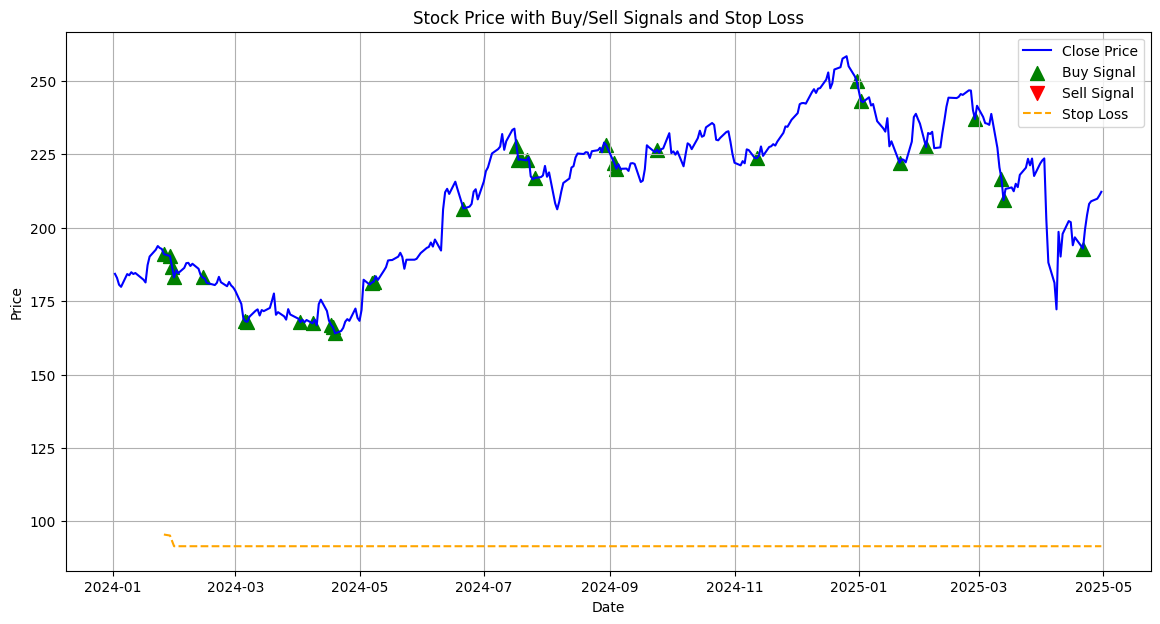

In [349]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')

buy_signals = stock_data[stock_data['Signal'] == 'Buy']
plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy Signal', marker='^', color='green', s=100)

sell_signals = stock_data[stock_data['Signal'] == 'Sell']
plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell Signal', marker='v', color='red', s=100)

plt.plot(stock_data.index, stock_data['Stop_Loss'], label='Stop Loss', color='orange', linestyle='--')

plt.title('Stock Price with Buy/Sell Signals and Stop Loss')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [350]:
import polars as pl 
import datetime as dt

In [351]:
df = pl.DataFrame({
    "name" : ["Alice", "Bob", "Charlie"],
    "Birthdate" : [dt.date(1990, 1, 1), dt.date(1985, 5, 15), dt.date(2000, 12, 31)],
    "Age" : [33, 38, 23],
    "weight" : [55.5, 70.0, 60.0],
    "height" : [1.65, 1.80, 1.75]
})

In [352]:
df

name,Birthdate,Age,weight,height
str,date,i64,f64,f64
"""Alice""",1990-01-01,33,55.5,1.65
"""Bob""",1985-05-15,38,70.0,1.8
"""Charlie""",2000-12-31,23,60.0,1.75


In [354]:
df.write_csv('output.csv')

In [355]:
df_csv = pl.read_csv('output.csv')

In [356]:
df_csv

name,Birthdate,Age,weight,height
str,str,i64,f64,f64
"""Alice""","""1990-01-01""",33,55.5,1.65
"""Bob""","""1985-05-15""",38,70.0,1.8
"""Charlie""","""2000-12-31""",23,60.0,1.75


In [357]:
pl.col('weight')/pl.col('height')**2

<Expr ['[(col("weight")) / (col("heigh…'] at 0x23B4B0F00D0>

In [358]:
result = df.select(
    pl.col('name'),
    pl.col('Birthdate').dt.year().alias('Birth Year'),
    (pl.col('weight')/pl.col('height')**2).alias('BMI'),

)

In [359]:
result

name,Birth Year,BMI
str,i32,f64
"""Alice""",1990,20.385675
"""Bob""",1985,21.604938
"""Charlie""",2000,19.591837


In [360]:
result = df.select(
    pl.col("name"),
    (pl.col("weight", "height") * 0.95).round(2).name.suffix("-5%"),
)

In [361]:
result

name,weight-5%,height-5%
str,f64,f64
"""Alice""",52.72,1.57
"""Bob""",66.5,1.71
"""Charlie""",57.0,1.66


In [362]:
result = df.with_columns(
    birth_year = pl.col("Birthdate").dt.year(),
    bmi = (pl.col("weight") / pl.col("height")**2).alias("BMI"),
)

In [363]:
print(result)

shape: (3, 7)
┌─────────┬────────────┬─────┬────────┬────────┬────────────┬───────────┐
│ name    ┆ Birthdate  ┆ Age ┆ weight ┆ height ┆ birth_year ┆ bmi       │
│ ---     ┆ ---        ┆ --- ┆ ---    ┆ ---    ┆ ---        ┆ ---       │
│ str     ┆ date       ┆ i64 ┆ f64    ┆ f64    ┆ i32        ┆ f64       │
╞═════════╪════════════╪═════╪════════╪════════╪════════════╪═══════════╡
│ Alice   ┆ 1990-01-01 ┆ 33  ┆ 55.5   ┆ 1.65   ┆ 1990       ┆ 20.385675 │
│ Bob     ┆ 1985-05-15 ┆ 38  ┆ 70.0   ┆ 1.8    ┆ 1985       ┆ 21.604938 │
│ Charlie ┆ 2000-12-31 ┆ 23  ┆ 60.0   ┆ 1.75   ┆ 2000       ┆ 19.591837 │
└─────────┴────────────┴─────┴────────┴────────┴────────────┴───────────┘


In [364]:
result = df.filter(
    pl.col("weight") > 60,
)

In [365]:
print(result)

shape: (1, 5)
┌──────┬────────────┬─────┬────────┬────────┐
│ name ┆ Birthdate  ┆ Age ┆ weight ┆ height │
│ ---  ┆ ---        ┆ --- ┆ ---    ┆ ---    │
│ str  ┆ date       ┆ i64 ┆ f64    ┆ f64    │
╞══════╪════════════╪═════╪════════╪════════╡
│ Bob  ┆ 1985-05-15 ┆ 38  ┆ 70.0   ┆ 1.8    │
└──────┴────────────┴─────┴────────┴────────┘


In [366]:
result = df.filter(
    pl.col("Birthdate").is_between(dt.date(1998, 12, 31),dt.date(2000, 1, 1)),
    pl.col("height") > 1.7,
)

In [367]:
result

name,Birthdate,Age,weight,height
str,date,i64,f64,f64


In [368]:
result = df.group_by(
    (pl.col("Birthdate").dt.year()//10 * 10).alias("Birth Year Decade"),
    maintain_order=True
).len()

print(result)


shape: (3, 2)
┌───────────────────┬─────┐
│ Birth Year Decade ┆ len │
│ ---               ┆ --- │
│ i32               ┆ u32 │
╞═══════════════════╪═════╡
│ 1990              ┆ 1   │
│ 1980              ┆ 1   │
│ 2000              ┆ 1   │
└───────────────────┴─────┘


In [370]:
result = df.group_by(
    (pl.col("Birthdate").dt.year()//10*10).alias("Birth Year Decade"),
    maintain_order=True
).agg(
    pl.len().alias("sample_size"),
    pl.col("weight").mean().round(2).alias("Average_weight"),
    pl.col("height").max().alias("Max_height"),
)

print(result)

shape: (3, 4)
┌───────────────────┬─────────────┬────────────────┬────────────┐
│ Birth Year Decade ┆ sample_size ┆ Average_weight ┆ Max_height │
│ ---               ┆ ---         ┆ ---            ┆ ---        │
│ i32               ┆ u32         ┆ f64            ┆ f64        │
╞═══════════════════╪═════════════╪════════════════╪════════════╡
│ 1990              ┆ 1           ┆ 55.5           ┆ 1.65       │
│ 1980              ┆ 1           ┆ 70.0           ┆ 1.8        │
│ 2000              ┆ 1           ┆ 60.0           ┆ 1.75       │
└───────────────────┴─────────────┴────────────────┴────────────┘


In [371]:
result = df.with_columns(
    (pl.col("Birthdate").dt.year()//10*10).alias("Birth Year Decade"),
    pl.col("name").str.split(by = " ").list.first(),
).select(
    pl.all().exclude("Birtdate"),
).group_by(
    pl.col("Birth Year Decade"),
    maintain_order=True
).agg(
        pl.col("name"),
        pl.col("weight", "height").mean().round(2).name.prefix("avg_"),
    )

print(result)

shape: (3, 4)
┌───────────────────┬─────────────┬────────────┬────────────┐
│ Birth Year Decade ┆ name        ┆ avg_weight ┆ avg_height │
│ ---               ┆ ---         ┆ ---        ┆ ---        │
│ i32               ┆ list[str]   ┆ f64        ┆ f64        │
╞═══════════════════╪═════════════╪════════════╪════════════╡
│ 1990              ┆ ["Alice"]   ┆ 55.5       ┆ 1.65       │
│ 1980              ┆ ["Bob"]     ┆ 70.0       ┆ 1.8        │
│ 2000              ┆ ["Charlie"] ┆ 60.0       ┆ 1.75       │
└───────────────────┴─────────────┴────────────┴────────────┘
